In [1]:
# Libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 600

# Constants
tf = 60
t_plotting = np.arange(0, tf, 1)
num_curves = 25000

In [2]:

# Data loading
curves_00001 = pd.read_csv("data_00001.csv", header=None)
curves_00001 = curves_00001.values

analytical = pd.read_csv("data_analytical.csv", header=None)
analytical = analytical.values

curves_0001 = pd.read_csv("data_hq.csv", header=None)
curves_0001 = curves_0001.values
curves_0001 = curves_0001[:, 2:] # Remove t and y(t)

Error cuadrado NFBL: 0.05428549131145112


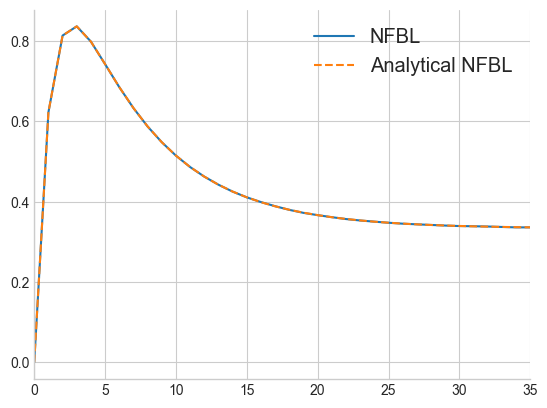

In [3]:
plt.plot(t_plotting, curves_00001[0], label="NFBL")
plt.plot(t_plotting, analytical[0], label="Analytical NFBL", linestyle="--")
plt.xlim([0, 35])
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')

errors_sq_nfbl = np.sum((curves_00001[:num_curves] - analytical[:num_curves])**2)
print(f"Error cuadrado NFBL: {errors_sq_nfbl}")

Error cuadrado IFFL: 0.05428549131145112


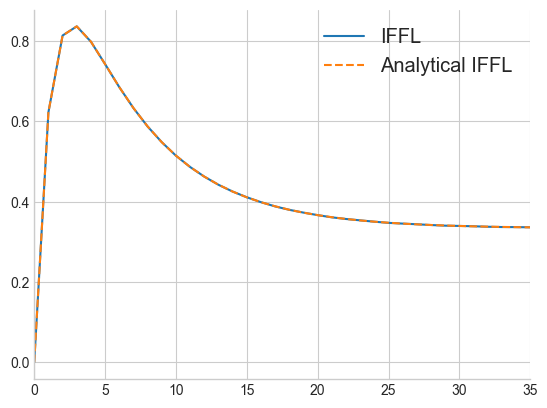

In [4]:
plt.plot(t_plotting, curves_00001[num_curves+1], label="IFFL")
plt.plot(t_plotting, analytical[num_curves+1], label="Analytical IFFL", linestyle="--")
plt.xlim([0, 35])
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')

errors_sq_iffl = np.sum((curves_00001[num_curves:] - analytical[num_curves:])**2)
print(f"Error cuadrado IFFL: {errors_sq_nfbl}")

(0.0, 2e-07)

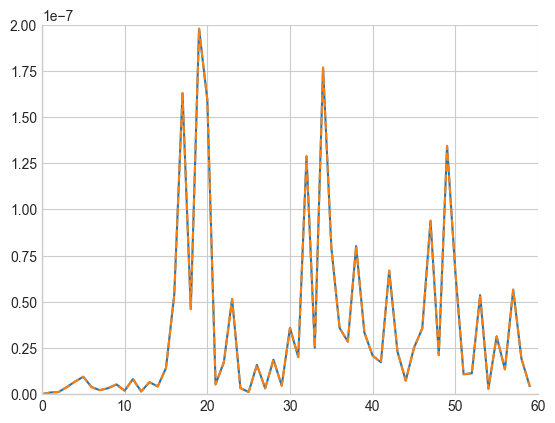

In [18]:
error_por_indice_nfbl = np.mean((curves_00001[:num_curves] - analytical[:num_curves])**2, axis=0);
error_por_indice_iffl = np.mean((curves_00001[num_curves:] - analytical[num_curves:])**2, axis=0);

plt.plot(t_plotting, error_por_indice_nfbl, label="Error NFBL")
plt.plot(t_plotting, error_por_indice_nfbl, label="Error IFFL", linestyle="--")
plt.xlim([0, 60])
plt.ylim([0, 2e-7])

In [19]:
errors_sq = np.sum((error_por_indice_nfbl - error_por_indice_iffl)**2)
print(f"Error cuadrado (por indice): {errors_sq}")

Error cuadrado (por indice): 1.9999675738963878e-13


In [8]:
errors_sq_sim = np.sum((curves_00001[num_curves:] - curves_00001[:num_curves])**2)
print(f"Error cuadrado simulación (entre NFBL e IFFL): {errors_sq_sim}")

Error cuadrado simulación (entre NFBL e IFFL): 0.14217150213218765


In [9]:
errors_sq_circuito_nfbl = np.sum((curves_00001[0:int(num_curves/2)] - curves_00001[int(num_curves/2):num_curves])**2)
print(f"Error cuadrado simulación entre NFBL: {errors_sq_circuito_nfbl}")

Error cuadrado simulación entre NFBL: 0.016862199518080337


In [10]:
errors_sq_circuito_iffl = np.sum((curves_00001[num_curves:int(num_curves/2)+num_curves] - curves_00001[int(num_curves/2)+num_curves:num_curves*2])**2)
print(f"Error cuadrado simulación entre IFFL: {errors_sq_circuito_iffl}")

Error cuadrado simulación entre IFFL: 3.467813153157559e-12


In [11]:
errors_sq_analy = np.sum((analytical[num_curves:] - analytical[:num_curves])**2)
print(f"Error cuadrado analitica: {errors_sq_analy}")

Error cuadrado analitica: 3.0905998707724623e-27


In [12]:
errors_sq_sim_0001 = np.sum((curves_0001[num_curves:] - curves_0001[:num_curves])**2)
print(f"Error cuadrado simulación (entre NFBL e IFFL, dt = 0.001): {errors_sq_sim_0001}")

Error cuadrado simulación (entre NFBL e IFFL, dt = 0.001): 0.1422104475867369
